# Imports

In [1]:
import importlib
import sys
import torch

sys.path.insert(0, '..')
sys.path.insert(0, '../..')
sys.path.insert(0, '../../..')

# Data

### Load Data Files

In [2]:
# Path to your pickle file (saved with torch.save)
file_path_train = '../../../../encoded_data/Sepsis_all_5_train.pkl'
# Load the dataset using torch.load
sepsis_train_dataset = torch.load(file_path_train, weights_only=False)
# Check the type of the loaded dataset
print(type(sepsis_train_dataset))  # Should output something like <class 'torch.utils.data.dataset.TensorDataset'>

# Path to your pickle file (saved with torch.save)
file_path_val = '../../../../encoded_data/Sepsis_all_5_val.pkl'
# Load the dataset using torch.load
sepsis_val_dataset = torch.load(file_path_val, weights_only=False)
# Check the type of the loaded dataset
print(type(sepsis_val_dataset))  # Should output something like <class 'torch.utils.data.dataset.TensorDataset'>

<class 'event_log_loader.new_event_log_loader.EventLogDataset'>
<class 'event_log_loader.new_event_log_loader.EventLogDataset'>


### Train Data Insights

In [3]:
# BPIC 17 Dataset Categories, Features:

sepsis_all_categories = sepsis_train_dataset.all_categories

sepsis_all_categories_cat = sepsis_all_categories[0]
print(sepsis_all_categories_cat)

sepsis_all_categories_num = sepsis_all_categories[1]
print(sepsis_all_categories_num)

for i, cat in enumerate(sepsis_all_categories_cat):
     print(f"Sepsis (5) Categorical feature: {cat[0]}, Index position in categorical data list: {i}")
     print(f"Sepsis (5) Total Amount of Category labels: {cat[1]}")
print('\n')    
for i, num in enumerate(sepsis_all_categories_num):
     print(f"Sepsis (5) Numerical feature: {num[0]}, Index position in categorical data list: {i}")
     print(f"Sepsis (5) Amount Category Lables: {num[1]}")

[('concept:name', 18, {'Admission IC': 1, 'Admission NC': 2, 'CRP': 3, 'EOS': 4, 'ER Registration': 5, 'ER Sepsis Triage': 6, 'ER Triage': 7, 'IV Antibiotics': 8, 'IV Liquid': 9, 'LacticAcid': 10, 'Leucocytes': 11, 'Release A': 12, 'Release B': 13, 'Release C': 14, 'Release D': 15, 'Release E': 16, 'Return ER': 17}), ('InfectionSuspected', 5, {'EOS': 1, 'False': 2, 'True': 3, nan: 4}), ('org:group', 27, {'?': 1, 'A': 2, 'B': 3, 'C': 4, 'D': 5, 'E': 6, 'EOS': 7, 'F': 8, 'G': 9, 'H': 10, 'I': 11, 'J': 12, 'K': 13, 'L': 14, 'M': 15, 'N': 16, 'O': 17, 'P': 18, 'Q': 19, 'R': 20, 'S': 21, 'T': 22, 'U': 23, 'V': 24, 'W': 25, 'X': 26}), ('DiagnosticBlood', 5, {'EOS': 1, 'False': 2, 'True': 3, nan: 4}), ('DisfuncOrg', 5, {'EOS': 1, 'False': 2, 'True': 3, nan: 4}), ('SIRSCritTachypnea', 5, {'EOS': 1, 'False': 2, 'True': 3, nan: 4}), ('Hypotensie', 5, {'EOS': 1, 'False': 2, 'True': 3, nan: 4}), ('SIRSCritHeartRate', 5, {'EOS': 1, 'False': 2, 'True': 3, nan: 4}), ('Infusion', 5, {'EOS': 1, 'False'

### Input Features for Encoder and Decoder

In [4]:
# Create lists with name of Encoder features (input) and decoder features (input & output)

# Encoder features:
enc_feat_cat = []
enc_feat_num = []
for cat in sepsis_all_categories_cat:
    enc_feat_cat.append(cat[0])
for num in sepsis_all_categories_num:
    enc_feat_num.append(num[0])
enc_feat = [enc_feat_cat, enc_feat_num]
print("Input features encoder: ", enc_feat)

"""
# Decoder features:
dec_feat_cat = enc_feat_cat
dec_feat_num = enc_feat_num
dec_feat = [dec_feat_cat, dec_feat_num]
print("Features decoder: ", dec_feat)
"""

# Decoder features:
dec_feat_cat = ['concept:name', 'org:group', 'lifecycle:transition']
dec_feat_num = ['case_elapsed_time', 'event_elapsed_time']
dec_feat = [dec_feat_cat, dec_feat_num]
print("Features decoder: ", dec_feat)

Input features encoder:  [['concept:name', 'InfectionSuspected', 'org:group', 'DiagnosticBlood', 'DisfuncOrg', 'SIRSCritTachypnea', 'Hypotensie', 'SIRSCritHeartRate', 'Infusion', 'DiagnosticArtAstrup', 'DiagnosticIC', 'DiagnosticSputum', 'DiagnosticLiquor', 'DiagnosticOther', 'SIRSCriteria2OrMore', 'DiagnosticXthorax', 'SIRSCritTemperature', 'DiagnosticUrinaryCulture', 'SIRSCritLeucos', 'Oligurie', 'DiagnosticLacticAcid', 'lifecycle:transition', 'Diagnose', 'Hypoxie', 'DiagnosticUrinarySediment', 'DiagnosticECG'], ['case_elapsed_time', 'event_elapsed_time', 'day_in_week', 'seconds_in_day', 'Age', 'Leucocytes', 'CRP', 'LacticAcid']]
Features decoder:  [['concept:name', 'org:group', 'lifecycle:transition'], ['case_elapsed_time', 'event_elapsed_time']]


# Model

In [5]:
import model.dropout_uncertainty_enc_dec_LSTM.dropout_uncertainty_model
importlib.reload(model.dropout_uncertainty_enc_dec_LSTM.dropout_uncertainty_model)
from model.dropout_uncertainty_enc_dec_LSTM.dropout_uncertainty_model import DropoutUncertaintyEncoderDecoderLSTM

# Prediction decoder output sequence length
seq_len_pred = 4

# Size hidden layer
hidden_size = 128

# Number of cells
num_layers = 4

# Fixed Dropout probability 
dropout = 0.1

# Encoder Decoder model initialization
model = DropoutUncertaintyEncoderDecoderLSTM(data_set_categories=sepsis_all_categories,
                                             enc_feat=enc_feat,
                                             dec_feat=dec_feat,
                                             seq_len_pred=seq_len_pred,
                                             hidden_size=hidden_size,
                                             num_layers=num_layers,
                                             dropout=dropout)

Data set categories:  ([('concept:name', 18, {'Admission IC': 1, 'Admission NC': 2, 'CRP': 3, 'EOS': 4, 'ER Registration': 5, 'ER Sepsis Triage': 6, 'ER Triage': 7, 'IV Antibiotics': 8, 'IV Liquid': 9, 'LacticAcid': 10, 'Leucocytes': 11, 'Release A': 12, 'Release B': 13, 'Release C': 14, 'Release D': 15, 'Release E': 16, 'Return ER': 17}), ('InfectionSuspected', 5, {'EOS': 1, 'False': 2, 'True': 3, nan: 4}), ('org:group', 27, {'?': 1, 'A': 2, 'B': 3, 'C': 4, 'D': 5, 'E': 6, 'EOS': 7, 'F': 8, 'G': 9, 'H': 10, 'I': 11, 'J': 12, 'K': 13, 'L': 14, 'M': 15, 'N': 16, 'O': 17, 'P': 18, 'Q': 19, 'R': 20, 'S': 21, 'T': 22, 'U': 23, 'V': 24, 'W': 25, 'X': 26}), ('DiagnosticBlood', 5, {'EOS': 1, 'False': 2, 'True': 3, nan: 4}), ('DisfuncOrg', 5, {'EOS': 1, 'False': 2, 'True': 3, nan: 4}), ('SIRSCritTachypnea', 5, {'EOS': 1, 'False': 2, 'True': 3, nan: 4}), ('Hypotensie', 5, {'EOS': 1, 'False': 2, 'True': 3, nan: 4}), ('SIRSCritHeartRate', 5, {'EOS': 1, 'False': 2, 'True': 3, nan: 4}), ('Infusion'

# Loss Object Creation

In [6]:
import loss.losses
importlib.reload(loss.losses)
from loss.losses import Loss

loss_obj = Loss()

# Numerical features trained with log-normal loss:
log_normal_loss_num_feature = ['case_elapsed_time', 'event_elapsed_time']

# Training Configuration

In [ ]:
import trainer.trainer
importlib.reload(trainer.trainer)
from trainer.trainer import Trainer
from torch.optim.lr_scheduler import ReduceLROnPlateau

from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter(comment="Full_Sepsis_grad")

# device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Start learning rate
learning_rate = 1e-5

# Optimizer and Scheduler
# optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate, weight_decay=0)
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=0)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.01, patience=1, min_lr=1e-9)

# Epochs
num_epochs = 100

# Batch size
batch_size = 128

# lambda for L2 (weight, bias, dropout) regularization: According to formula: 1/2N
# regularization_term = 1.0/(2.0*batch_size)
regularization_term =  1e-4

# shuffle data
shuffle = True

# Teacher forcing: Smaller 0.5 more predicted events are used for next event prediction.
teacher_forcing_ratio = 0.8

optimize_values = {"regularization_term":regularization_term,
                   "optimizer":optimizer,
                   "scheduler": scheduler,
                   "epochs":num_epochs,
                   "mini_batches":batch_size,
                   "shuffle": shuffle,
                   "teacher_forcing_ratio":teacher_forcing_ratio,}

suffix_data_split_value = 4

# GradNorm parameter
use_gradnorm = True
gn_alpha = 1.5
gn_learning_rate = 1e-4
# gn_learning_rate =  0.025

number_tasks = len(dec_feat[0]) + len(dec_feat[1])

gradNorm = {"use_gradnorm":use_gradnorm,
            "number_tasks": number_tasks,
            "gn_alpha":gn_alpha,
            "gn_learning_rate": gn_learning_rate}

trainer = Trainer(device=device,
                  model=model,
                  data_train=sepsis_train_dataset,
                  data_val=sepsis_val_dataset,
                  loss_obj=loss_obj,
                  log_normal_loss_num_feature=log_normal_loss_num_feature,
                  optimize_values=optimize_values,
                  suffix_data_split_value=suffix_data_split_value,
                  writer=writer,
                  gradnorm_values=gradNorm,
                  save_model_n_th_epoch = 1,
                  saving_path = 'Sepsis_full_grad_norm_new_4layer.pkl')

# Train the model:
train_attenuated_losses, val_losses, val_attenuated_losses = trainer.train_model()

Device:  cuda
Model:  DropoutUncertaintyEncoderDecoderLSTM(
  (embeddings_enc): ModuleList(
    (0): Embedding(18, 8)
    (1): Embedding(5, 4)
    (2): Embedding(27, 10)
    (3-20): 18 x Embedding(5, 4)
    (21): Embedding(3, 3)
    (22): Embedding(123, 24)
    (23-25): 3 x Embedding(5, 4)
  )
  (encoder): DropoutUncertaintyLSTMEncoder(
    (embeddings): ModuleList(
      (0): Embedding(18, 8)
      (1): Embedding(5, 4)
      (2): Embedding(27, 10)
      (3-20): 18 x Embedding(5, 4)
      (21): Embedding(3, 3)
      (22): Embedding(123, 24)
      (23-25): 3 x Embedding(5, 4)
    )
    (first_layer): DropoutUncertaintyLSTMCell(
      (Wi): Linear(in_features=141, out_features=128, bias=True)
      (Ui): Linear(in_features=128, out_features=128, bias=True)
      (Wf): Linear(in_features=141, out_features=128, bias=True)
      (Uf): Linear(in_features=128, out_features=128, bias=True)
      (Wc): Linear(in_features=141, out_features=128, bias=True)
      (Uc): Linear(in_features=128, out_

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [1/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 9.9850


Validation: Avg Standard Validation Loss: 9.2535
Validation: Avg Attenuated Validation Loss: 9.4480
Validation Loss for Scheduler: 9.2535
saving model


Epoch [2/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 9.9424


Validation: Avg Standard Validation Loss: 9.2244
Validation: Avg Attenuated Validation Loss: 9.4209
Validation Loss for Scheduler: 9.2244
saving model


Epoch [3/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 9.8898


Validation: Avg Standard Validation Loss: 9.2939
Validation: Avg Attenuated Validation Loss: 9.4253
Validation Loss for Scheduler: 9.2939
saving model


Epoch [4/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 9.8257


Validation: Avg Standard Validation Loss: 9.1123
Validation: Avg Attenuated Validation Loss: 9.2812
Validation Loss for Scheduler: 9.1123
saving model


Epoch [5/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 9.5370


Validation: Avg Standard Validation Loss: 8.7140
Validation: Avg Attenuated Validation Loss: 8.7804
Validation Loss for Scheduler: 8.7140
saving model


Epoch [6/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 8.7541


Validation: Avg Standard Validation Loss: 7.8754
Validation: Avg Attenuated Validation Loss: 7.6978
Validation Loss for Scheduler: 7.8754
saving model


Epoch [7/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 7.6541


Validation: Avg Standard Validation Loss: 7.2105
Validation: Avg Attenuated Validation Loss: 6.8172
Validation Loss for Scheduler: 7.2105
saving model


Epoch [8/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 7.0804


Validation: Avg Standard Validation Loss: 6.9514
Validation: Avg Attenuated Validation Loss: 6.4178
Validation Loss for Scheduler: 6.9514
saving model


Epoch [9/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 6.7422


Validation: Avg Standard Validation Loss: 6.7305
Validation: Avg Attenuated Validation Loss: 6.1321
Validation Loss for Scheduler: 6.7305
saving model


Epoch [10/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 6.5252


Validation: Avg Standard Validation Loss: 6.6121
Validation: Avg Attenuated Validation Loss: 5.9604
Validation Loss for Scheduler: 6.6121
saving model


Epoch [11/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 6.3743


Validation: Avg Standard Validation Loss: 6.5548
Validation: Avg Attenuated Validation Loss: 5.8471
Validation Loss for Scheduler: 6.5548
saving model


Epoch [12/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 6.2737


Validation: Avg Standard Validation Loss: 6.5192
Validation: Avg Attenuated Validation Loss: 5.7710
Validation Loss for Scheduler: 6.5192
saving model


Epoch [13/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 6.1654


Validation: Avg Standard Validation Loss: 6.4828
Validation: Avg Attenuated Validation Loss: 5.7055
Validation Loss for Scheduler: 6.4828
saving model


Epoch [14/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 6.1232


Validation: Avg Standard Validation Loss: 6.4625
Validation: Avg Attenuated Validation Loss: 5.6582
Validation Loss for Scheduler: 6.4625
saving model


Epoch [15/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 6.0439


Validation: Avg Standard Validation Loss: 6.4248
Validation: Avg Attenuated Validation Loss: 5.6199
Validation Loss for Scheduler: 6.4248
saving model


Epoch [16/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 5.9894


Validation: Avg Standard Validation Loss: 6.4161
Validation: Avg Attenuated Validation Loss: 5.5942
Validation Loss for Scheduler: 6.4161
saving model


Epoch [17/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 5.9122


Validation: Avg Standard Validation Loss: 6.4352
Validation: Avg Attenuated Validation Loss: 5.5840
Validation Loss for Scheduler: 6.4352
saving model


Epoch [18/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 5.8639


Validation: Avg Standard Validation Loss: 6.4023
Validation: Avg Attenuated Validation Loss: 5.5579
Validation Loss for Scheduler: 6.4023
saving model


Epoch [19/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 5.7945


Validation: Avg Standard Validation Loss: 6.4090
Validation: Avg Attenuated Validation Loss: 5.5412
Validation Loss for Scheduler: 6.4090
saving model


Epoch [20/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 5.6921


Validation: Avg Standard Validation Loss: 6.4065
Validation: Avg Attenuated Validation Loss: 5.5338
Validation Loss for Scheduler: 6.4065
saving model


Epoch [21/100], Learning Rate: 1.0000000000000001e-07, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 5.6443


Validation: Avg Standard Validation Loss: 6.4400
Validation: Avg Attenuated Validation Loss: 5.5379
Validation Loss for Scheduler: 6.4400
saving model


Epoch [22/100], Learning Rate: 1.0000000000000001e-07, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 5.6504


Validation: Avg Standard Validation Loss: 6.4764
Validation: Avg Attenuated Validation Loss: 5.5923
Validation Loss for Scheduler: 6.4764
saving model


Epoch [23/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 5.6188


Validation: Avg Standard Validation Loss: 6.3817
Validation: Avg Attenuated Validation Loss: 5.5274
Validation Loss for Scheduler: 6.3817
saving model


Epoch [24/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 5.6492


Validation: Avg Standard Validation Loss: 6.4173
Validation: Avg Attenuated Validation Loss: 5.5215
Validation Loss for Scheduler: 6.4173
saving model


Epoch [25/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 5.6440


Validation: Avg Standard Validation Loss: 6.5029
Validation: Avg Attenuated Validation Loss: 5.6172
Validation Loss for Scheduler: 6.5029
saving model


Epoch [26/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 5.6954


Validation: Avg Standard Validation Loss: 6.3892
Validation: Avg Attenuated Validation Loss: 5.5034
Validation Loss for Scheduler: 6.3892
saving model


Epoch [27/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 5.6567


Validation: Avg Standard Validation Loss: 6.4613
Validation: Avg Attenuated Validation Loss: 5.5480
Validation Loss for Scheduler: 6.4613
saving model


Epoch [28/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 5.6713


Validation: Avg Standard Validation Loss: 6.4574
Validation: Avg Attenuated Validation Loss: 5.5633
Validation Loss for Scheduler: 6.4574
saving model


Epoch [29/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 5.6666


Validation: Avg Standard Validation Loss: 6.4775
Validation: Avg Attenuated Validation Loss: 5.5816
Validation Loss for Scheduler: 6.4775
saving model


Epoch [30/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 5.6648


Validation: Avg Standard Validation Loss: 6.3684
Validation: Avg Attenuated Validation Loss: 5.5128
Validation Loss for Scheduler: 6.3684
saving model


Epoch [31/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 5.6504


Validation: Avg Standard Validation Loss: 6.3681
Validation: Avg Attenuated Validation Loss: 5.5020
Validation Loss for Scheduler: 6.3681
saving model


Epoch [32/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 5.6296


Validation: Avg Standard Validation Loss: 6.3776
Validation: Avg Attenuated Validation Loss: 5.5369
Validation Loss for Scheduler: 6.3776
saving model


Epoch [33/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 5.6106


Validation: Avg Standard Validation Loss: 6.3818
Validation: Avg Attenuated Validation Loss: 5.5340
Validation Loss for Scheduler: 6.3818
saving model


Epoch [34/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 5.6161


Validation: Avg Standard Validation Loss: 6.4037
Validation: Avg Attenuated Validation Loss: 5.5388
Validation Loss for Scheduler: 6.4037
saving model


Epoch [35/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 5.6023


Validation: Avg Standard Validation Loss: 6.4188
Validation: Avg Attenuated Validation Loss: 5.5299
Validation Loss for Scheduler: 6.4188
saving model


Epoch [36/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 5.6102


Validation: Avg Standard Validation Loss: 6.5170
Validation: Avg Attenuated Validation Loss: 5.5994
Validation Loss for Scheduler: 6.5170
saving model


Epoch [37/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 5.6073


Validation: Avg Standard Validation Loss: 6.3701
Validation: Avg Attenuated Validation Loss: 5.5074
Validation Loss for Scheduler: 6.3701
saving model


Epoch [38/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 5.5903


Validation: Avg Standard Validation Loss: 6.3695
Validation: Avg Attenuated Validation Loss: 5.5055
Validation Loss for Scheduler: 6.3695
saving model


Epoch [39/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 5.6041


Validation: Avg Standard Validation Loss: 6.3726
Validation: Avg Attenuated Validation Loss: 5.5125
Validation Loss for Scheduler: 6.3726
saving model


Epoch [40/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 5.6206


Validation: Avg Standard Validation Loss: 6.4088
Validation: Avg Attenuated Validation Loss: 5.5340
Validation Loss for Scheduler: 6.4088
saving model


Epoch [41/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 5.6204


Validation: Avg Standard Validation Loss: 6.4340
Validation: Avg Attenuated Validation Loss: 5.5642
Validation Loss for Scheduler: 6.4340
saving model


Epoch [42/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 5.5793


Validation: Avg Standard Validation Loss: 6.3839
Validation: Avg Attenuated Validation Loss: 5.5333
Validation Loss for Scheduler: 6.3839
saving model


Epoch [43/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 5.6223


Validation: Avg Standard Validation Loss: 6.3908
Validation: Avg Attenuated Validation Loss: 5.5428
Validation Loss for Scheduler: 6.3908
saving model


Epoch [44/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 5.6150


Validation: Avg Standard Validation Loss: 6.3749
Validation: Avg Attenuated Validation Loss: 5.5022
Validation Loss for Scheduler: 6.3749
saving model


Epoch [45/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 5.5869


Validation: Avg Standard Validation Loss: 6.4047
Validation: Avg Attenuated Validation Loss: 5.5335
Validation Loss for Scheduler: 6.4047
saving model


Epoch [46/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 5.6157


Validation: Avg Standard Validation Loss: 6.4162
Validation: Avg Attenuated Validation Loss: 5.5345
Validation Loss for Scheduler: 6.4162
saving model


Epoch [47/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 5.5718


Validation: Avg Standard Validation Loss: 6.4271
Validation: Avg Attenuated Validation Loss: 5.5679
Validation Loss for Scheduler: 6.4271
saving model


Epoch [48/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 5.5811


Validation: Avg Standard Validation Loss: 6.4935
Validation: Avg Attenuated Validation Loss: 5.5756
Validation Loss for Scheduler: 6.4935
saving model


Epoch [49/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 5.5754


Validation: Avg Standard Validation Loss: 6.4149
Validation: Avg Attenuated Validation Loss: 5.5559
Validation Loss for Scheduler: 6.4149
saving model


Epoch [50/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 5.6057


Validation: Avg Standard Validation Loss: 6.4068
Validation: Avg Attenuated Validation Loss: 5.5639
Validation Loss for Scheduler: 6.4068
saving model


Epoch [51/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 5.5505


Validation: Avg Standard Validation Loss: 6.3945
Validation: Avg Attenuated Validation Loss: 5.5260
Validation Loss for Scheduler: 6.3945
saving model


Epoch [52/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 5.6086


Validation: Avg Standard Validation Loss: 6.3621
Validation: Avg Attenuated Validation Loss: 5.5025
Validation Loss for Scheduler: 6.3621
saving model


Epoch [53/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 5.6498


Validation: Avg Standard Validation Loss: 6.3772
Validation: Avg Attenuated Validation Loss: 5.5154
Validation Loss for Scheduler: 6.3772
saving model


Epoch [54/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 5.5609


Validation: Avg Standard Validation Loss: 6.3780
Validation: Avg Attenuated Validation Loss: 5.5153
Validation Loss for Scheduler: 6.3780
saving model


Epoch [55/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 5.6015


Validation: Avg Standard Validation Loss: 6.3996
Validation: Avg Attenuated Validation Loss: 5.5352
Validation Loss for Scheduler: 6.3996
saving model


Epoch [56/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 5.5240


Validation: Avg Standard Validation Loss: 6.4047
Validation: Avg Attenuated Validation Loss: 5.5474
Validation Loss for Scheduler: 6.4047
saving model


Epoch [57/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 5.5264


Validation: Avg Standard Validation Loss: 6.3869
Validation: Avg Attenuated Validation Loss: 5.5296
Validation Loss for Scheduler: 6.3869
saving model


Epoch [58/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 5.5749


Validation: Avg Standard Validation Loss: 6.3756
Validation: Avg Attenuated Validation Loss: 5.4986
Validation Loss for Scheduler: 6.3756
saving model


Epoch [59/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 5.5504


Validation: Avg Standard Validation Loss: 6.3687
Validation: Avg Attenuated Validation Loss: 5.4760
Validation Loss for Scheduler: 6.3687
saving model


Epoch [60/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 5.5530


Validation: Avg Standard Validation Loss: 6.3656
Validation: Avg Attenuated Validation Loss: 5.5061
Validation Loss for Scheduler: 6.3656
saving model


Epoch [61/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 5.5831


Validation: Avg Standard Validation Loss: 6.3781
Validation: Avg Attenuated Validation Loss: 5.5099
Validation Loss for Scheduler: 6.3781
saving model


Epoch [62/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 5.5661


Validation: Avg Standard Validation Loss: 6.3956
Validation: Avg Attenuated Validation Loss: 5.5107
Validation Loss for Scheduler: 6.3956
saving model


Epoch [63/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 5.5612


Validation: Avg Standard Validation Loss: 6.3712
Validation: Avg Attenuated Validation Loss: 5.5186
Validation Loss for Scheduler: 6.3712
saving model


Epoch [64/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 5.5712


Validation: Avg Standard Validation Loss: 6.4123
Validation: Avg Attenuated Validation Loss: 5.5530
Validation Loss for Scheduler: 6.4123
saving model


Epoch [65/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 5.5550


Validation: Avg Standard Validation Loss: 6.4076
Validation: Avg Attenuated Validation Loss: 5.5542
Validation Loss for Scheduler: 6.4076
saving model


Epoch [66/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 5.5377


Validation: Avg Standard Validation Loss: 6.3665
Validation: Avg Attenuated Validation Loss: 5.4961
Validation Loss for Scheduler: 6.3665
saving model


Epoch [67/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 5.5213


Validation: Avg Standard Validation Loss: 6.3945
Validation: Avg Attenuated Validation Loss: 5.5283
Validation Loss for Scheduler: 6.3945
saving model


Epoch [68/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 5.5285


Validation: Avg Standard Validation Loss: 6.3906
Validation: Avg Attenuated Validation Loss: 5.5459
Validation Loss for Scheduler: 6.3906
saving model


Epoch [69/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 5.5070


Validation: Avg Standard Validation Loss: 6.3703
Validation: Avg Attenuated Validation Loss: 5.5075
Validation Loss for Scheduler: 6.3703
saving model


Epoch [70/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 5.5058


Validation: Avg Standard Validation Loss: 6.4784
Validation: Avg Attenuated Validation Loss: 5.6026
Validation Loss for Scheduler: 6.4784
saving model


Epoch [71/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 5.4892


Validation: Avg Standard Validation Loss: 6.4778
Validation: Avg Attenuated Validation Loss: 5.5887
Validation Loss for Scheduler: 6.4778
saving model


Epoch [72/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 5.5019


Validation: Avg Standard Validation Loss: 6.5681
Validation: Avg Attenuated Validation Loss: 5.6439
Validation Loss for Scheduler: 6.5681
saving model


Epoch [73/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 5.4821


Validation: Avg Standard Validation Loss: 6.3865
Validation: Avg Attenuated Validation Loss: 5.5170
Validation Loss for Scheduler: 6.3865
saving model


Epoch [74/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 5.5097


Validation: Avg Standard Validation Loss: 6.3742
Validation: Avg Attenuated Validation Loss: 5.5120
Validation Loss for Scheduler: 6.3742
saving model


Epoch [75/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 5.4951


Validation: Avg Standard Validation Loss: 6.3739
Validation: Avg Attenuated Validation Loss: 5.5057
Validation Loss for Scheduler: 6.3739
saving model


Epoch [76/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 5.4821


Validation: Avg Standard Validation Loss: 6.3972
Validation: Avg Attenuated Validation Loss: 5.5188
Validation Loss for Scheduler: 6.3972
saving model


Epoch [77/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 5.4931


Validation: Avg Standard Validation Loss: 6.4068
Validation: Avg Attenuated Validation Loss: 5.5560
Validation Loss for Scheduler: 6.4068
saving model


Epoch [78/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 5.5120


Validation: Avg Standard Validation Loss: 6.3762
Validation: Avg Attenuated Validation Loss: 5.5066
Validation Loss for Scheduler: 6.3762
saving model


Epoch [79/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 5.4612


Validation: Avg Standard Validation Loss: 6.4779
Validation: Avg Attenuated Validation Loss: 5.5526
Validation Loss for Scheduler: 6.4779
saving model


Epoch [80/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 5.5600


Validation: Avg Standard Validation Loss: 6.4044
Validation: Avg Attenuated Validation Loss: 5.5444
Validation Loss for Scheduler: 6.4044
saving model


Epoch [81/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 5.4979


Validation: Avg Standard Validation Loss: 6.3760
Validation: Avg Attenuated Validation Loss: 5.5187
Validation Loss for Scheduler: 6.3760
saving model


Epoch [82/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 5.4978


Validation: Avg Standard Validation Loss: 6.3915
Validation: Avg Attenuated Validation Loss: 5.5149
Validation Loss for Scheduler: 6.3915
saving model


Epoch [83/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 5.5355


Validation: Avg Standard Validation Loss: 6.4047
Validation: Avg Attenuated Validation Loss: 5.5394
Validation Loss for Scheduler: 6.4047
saving model


Epoch [84/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 5.4558


Validation: Avg Standard Validation Loss: 6.3763
Validation: Avg Attenuated Validation Loss: 5.5208
Validation Loss for Scheduler: 6.3763
saving model


Epoch [85/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 5.4571


Validation: Avg Standard Validation Loss: 6.3713
Validation: Avg Attenuated Validation Loss: 5.5202
Validation Loss for Scheduler: 6.3713
saving model


Epoch [86/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 5.5441


Validation: Avg Standard Validation Loss: 6.3945
Validation: Avg Attenuated Validation Loss: 5.5270
Validation Loss for Scheduler: 6.3945
saving model


Epoch [87/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 5.5021


Validation: Avg Standard Validation Loss: 6.4150
Validation: Avg Attenuated Validation Loss: 5.5412
Validation Loss for Scheduler: 6.4150
saving model


Epoch [88/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 5.5014


Validation: Avg Standard Validation Loss: 6.4048
Validation: Avg Attenuated Validation Loss: 5.5163
Validation Loss for Scheduler: 6.4048
saving model


Epoch [89/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 5.4742


Validation: Avg Standard Validation Loss: 6.3790
Validation: Avg Attenuated Validation Loss: 5.5158
Validation Loss for Scheduler: 6.3790
saving model


Epoch [90/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 5.5196


Validation: Avg Standard Validation Loss: 6.3862
Validation: Avg Attenuated Validation Loss: 5.5303
Validation Loss for Scheduler: 6.3862
saving model


Epoch [91/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 5.4375


Validation: Avg Standard Validation Loss: 6.3684
Validation: Avg Attenuated Validation Loss: 5.5030
Validation Loss for Scheduler: 6.3684
saving model


Epoch [92/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 5.4803


Validation: Avg Standard Validation Loss: 6.3854
Validation: Avg Attenuated Validation Loss: 5.5013
Validation Loss for Scheduler: 6.3854
saving model


Epoch [93/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 5.4351


Validation: Avg Standard Validation Loss: 6.3867
Validation: Avg Attenuated Validation Loss: 5.5402
Validation Loss for Scheduler: 6.3867
saving model


Epoch [94/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 5.5078


Validation: Avg Standard Validation Loss: 6.3863
Validation: Avg Attenuated Validation Loss: 5.4875
Validation Loss for Scheduler: 6.3863
saving model


Epoch [95/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 5.4787


Validation: Avg Standard Validation Loss: 6.3918
Validation: Avg Attenuated Validation Loss: 5.5266
Validation Loss for Scheduler: 6.3918
saving model


Epoch [96/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 5.5461


Validation: Avg Standard Validation Loss: 6.4151
Validation: Avg Attenuated Validation Loss: 5.5346
Validation Loss for Scheduler: 6.4151
saving model


Epoch [97/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 5.4118


Validation: Avg Standard Validation Loss: 6.4053
Validation: Avg Attenuated Validation Loss: 5.5243
Validation Loss for Scheduler: 6.4053
saving model


Epoch [98/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 5.4182


Validation: Avg Standard Validation Loss: 6.3757
Validation: Avg Attenuated Validation Loss: 5.5136
Validation Loss for Scheduler: 6.3757
saving model


Epoch [99/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 5.4160


Validation: Avg Standard Validation Loss: 6.3936
Validation: Avg Attenuated Validation Loss: 5.5211
Validation Loss for Scheduler: 6.3936
saving model


Epoch [100/100], Learning Rate: 1e-09, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 5.4839


Validation: Avg Standard Validation Loss: 6.4145
Validation: Avg Attenuated Validation Loss: 5.5316
Validation Loss for Scheduler: 6.4145
saving model
Training complete.
Model saved to path: Sepsis_full_grad_norm_new_4layer.pkl


# Training Visualization

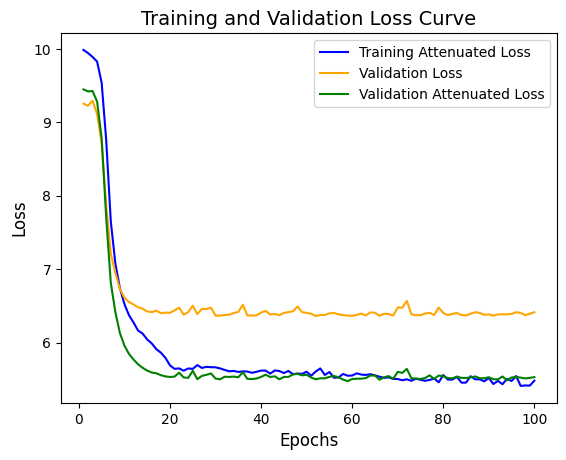

In [8]:
import matplotlib.pyplot as plt

# After training is finished, plot the loss curves
plt.plot(range(1, num_epochs+1), train_attenuated_losses, label='Training Attenuated Loss', color='blue')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss', color='orange')
plt.plot(range(1, num_epochs+1), val_attenuated_losses, label='Validation Attenuated Loss', color='green')
# Labeling x and y axes
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
# Adding title
plt.title('Training and Validation Loss Curve', fontsize=14)
# Adding legend
plt.legend()
# Show the plot
plt.show()